In [1]:
%matplotlib inline
import os
import pprint

import npc_sessions

In [2]:
# get input arguments from environment variables:
env = os.environ
session_path_or_id = env.pop('NPC_SESSION_PATH_OR_ID')
session_kwargs = {
    k.replace('NPC_SESSION_', '').lower(): eval(v)
    for k, v in env.items()
    if k.startswith('NPC_SESSION_')
}

session = npc_sessions.DynamicRoutingSession(
    session_path_or_id,
    **session_kwargs,
)

print(f"input:\n{session_path_or_id = }")
pprint.pprint(session_kwargs)

input:
session_path_or_id = '664566_20230403'
{'is_ephys': False}


## behavior

/home/runner/work/npc_sessions/npc_sessions/.venv/lib/python3.9/site-packages/DynamicRoutingTask/Analysis/DynamicRoutingAnalysisUtils.py:214: RuntimeWarning: invalid value encountered in scalar divide
  self.falseAlarmOtherModalGo.append(self.falseAlarmTrials[otherModalGo].sum() / otherModalGo.sum())
/home/runner/work/npc_sessions/npc_sessions/.venv/lib/python3.9/site-packages/DynamicRoutingTask/Analysis/DynamicRoutingAnalysisUtils.py:215: RuntimeWarning: invalid value encountered in scalar divide
  self.falseAlarmOtherModalNogo.append(self.falseAlarmTrials[otherModalNogo].sum() / otherModalNogo.sum())


KeyError: 'behavior'

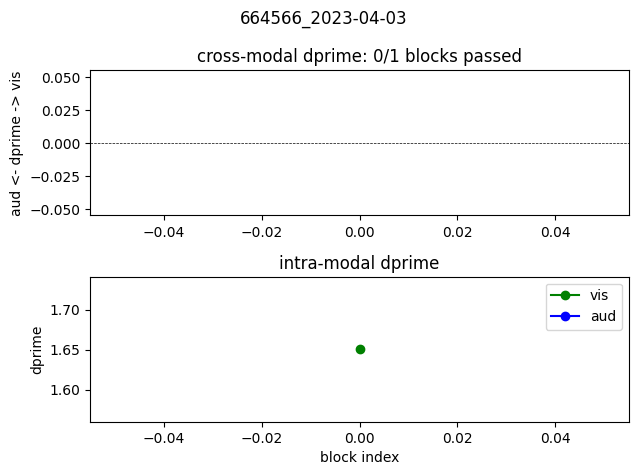

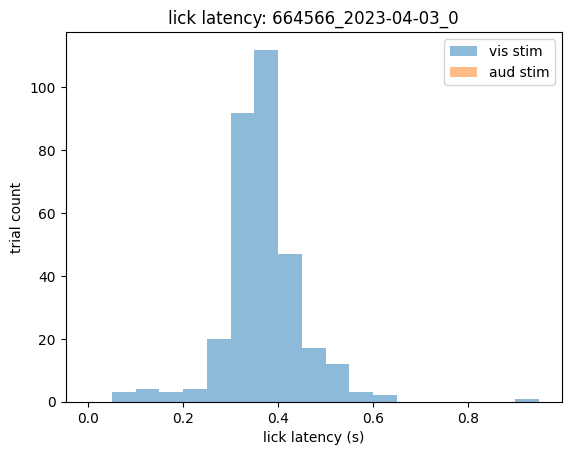

In [3]:
session.plot_performance_by_block()
session.plot_first_lick_latency_hist()
session.plot_lick_raster()
session.plot_running();

# Sync

In [4]:
if session.is_sync:
    session.plot_bad_lick_times()
    session.plot_lick_times_on_sync_and_script()
    session.plot_reward_times();

### barcodes

get barcode intervals for each probe

Plot barcode intervals for sync and for each probe after sample rate correction

In [5]:
if session.is_ephys:
    session.plot_barcode_times()
    session.plot_barcode_intervals();

## stim timing

Plot vsync times and diode flips for the beginnings and ends of each stimulus epoch

In [6]:
if session.is_sync:
    session.plot_diode_flip_intervals()
    session.plot_histogram_of_vsync_intervals()
    session.plot_vsyncs_and_diode_flips_at_ends_of_each_stim()
    session.plot_long_vsyncs_distribution_across_trial();

plot histogram of vsync intervals
TO DO: add histogram of diode flip intervals

Plot indicating where long frames happened relative to stim times during task

Generate report indicating how many long frames we got and whether there were weird things with the diode (vsync number vs diode flip number, how many blips we got on the diode line etc)

Plot sound latencies/durations across session

# MVR

Plot frames taken across session

Show a few frames around lick times in `trials.response_time`

Verify frame times can be found on sync: generate report describing frame rate/lost frames/discrepancy between frames expected from sync and frames in video

In [7]:
if session.is_video:
    session.plot_camera_frame_grabs_simple()
    session.plot_video_info()
    if not any(session.trials[:].query("is_response")):
        session.plot_video_frames_with_licks(lick_time=session['processing']['behavior']['licks'][0]);
        session.plot_video_frames_with_licks(lick_time=session['processing']['behavior']['licks'][-1]);
    else:
        session.plot_video_frames_with_licks();

## Recording Quality

Drift raster for each probe

Quality metric histograms for each probe (isi violoations, amplitude cutoff, drift ptp)

all spike histograms for each probe

Cumulative reward volume over session

## Basic Sync Report

Generate report showing 1) number of edges, 2) median edge interval 3) overall edge frequency for each data line in sync file

# Spikes

In [8]:
if session.is_sorted:
    session.plot_all_unit_spike_histograms()    
    session.plot_drift_maps()
    session.plot_unit_quality_metrics_per_probe();